# Step 1: Importing necessary libraries
## We use pandas for data handling, scikit-learn for ML models, and metrics for evaluation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Loading and preprocessing the dataset
## Reading the WineQT.csv file and handling missing values

In [2]:
data = pd.read_csv('E:\summer of code\WineQT.csv')

# Dropping the 'Id' column as it's not relevant for prediction
data = data.drop('Id', axis=1)

# Checking for missing values and filling with mean if any
data.fillna(data.mean(), inplace=True)

# Defining features (X) and target (y)
# 'quality' is the target variable, others are features
X = data.drop('quality', axis=1)
y = data['quality']

# Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 3: Initial Model Training

In [3]:
# Training a Decision Tree Classifier with default parameters
dt_initial = DecisionTreeClassifier(random_state=42)
dt_initial.fit(X_train, y_train)

# Training a Random Forest Classifier with default parameters
rf_initial = RandomForestClassifier(random_state=42)
rf_initial.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 4: Evaluating Initial Models

In [4]:
# Predicting and calculating accuracy for Decision Tree
y_pred_dt_initial = dt_initial.predict(X_test)
dt_initial_accuracy = accuracy_score(y_test, y_pred_dt_initial)

Initial Decision Tree Accuracy: 0.5283842794759825
Initial Random Forest Accuracy: 0.7030567685589519


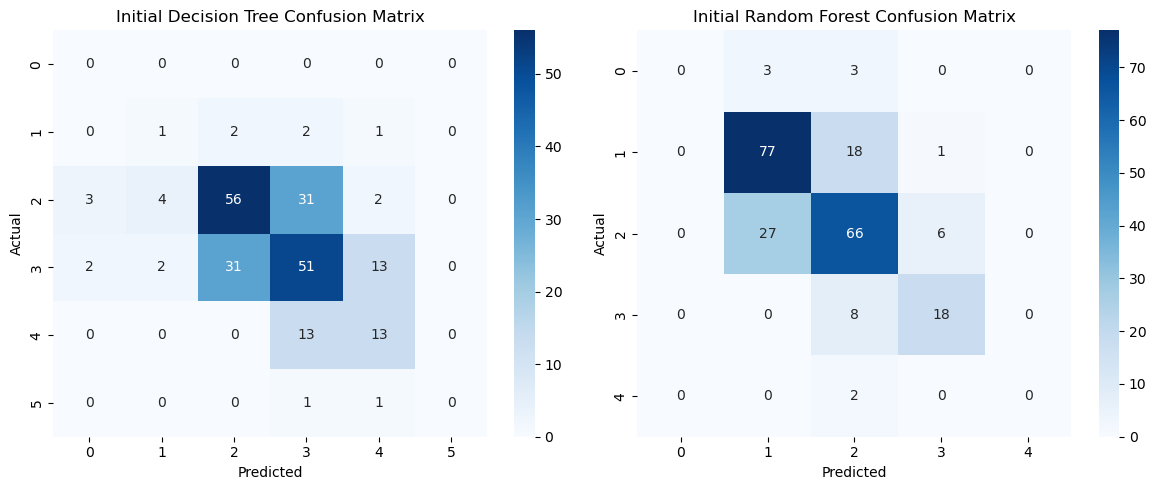


Initial Decision Tree Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.14      0.17      0.15         6
           5       0.63      0.58      0.61        96
           6       0.52      0.52      0.52        99
           7       0.43      0.50      0.46        26
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.29      0.29      0.29       229
weighted avg       0.54      0.53      0.53       229


Initial Random Forest Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           

In [6]:
# Predicting and calculating accuracy for Random Forest
y_pred_rf_initial = rf_initial.predict(X_test)
rf_initial_accuracy = accuracy_score(y_test, y_pred_rf_initial)

# Printing initial accuracies
print("Initial Decision Tree Accuracy:", dt_initial_accuracy)
print("Initial Random Forest Accuracy:", rf_initial_accuracy)

# Generating and plotting confusion matrices for initial models
cm_dt_initial = confusion_matrix(y_test, y_pred_dt_initial)
cm_rf_initial = confusion_matrix(y_test, y_pred_rf_initial)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt_initial, annot=True, fmt='d', cmap='Blues')
plt.title('Initial Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf_initial, annot=True, fmt='d', cmap='Blues')
plt.title('Initial Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Printing classification reports for initial models
print("\nInitial Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_initial, zero_division=0))
print("\nInitial Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_initial, zero_division=0))

# Step 5: Hyperparameter Tuning

In [7]:
# Tuning Decision Tree: Increasing max_depth and adjusting min_samples_split
dt_param_grid = {
    'max_depth': [5, 10, 15],  # Testing different depths
    'min_samples_split': [2, 5]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)
dt_tuned = dt_grid.best_estimator_
print("\nBest Decision Tree Parameters:", dt_grid.best_params_)

# Tuning Random Forest: Adjusting n_estimators and learning rate via max_depth
rf_param_grid = {
    'n_estimators': [50, 100],  # Reduced for faster execution
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_tuned = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)


Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


# Step 6: Model Optimization

In [8]:

# Using tuned models for prediction
y_pred_dt_tuned = dt_tuned.predict(X_test)
y_pred_rf_tuned = rf_tuned.predict(X_test)

In [9]:
# Calculating accuracies for tuned models
dt_tuned_accuracy = accuracy_score(y_test, y_pred_dt_tuned)
rf_tuned_accuracy = accuracy_score(y_test, y_pred_rf_tuned)

# Step 7: Comparing Accuracy Before and After Tuning

In [10]:
print("\nAccuracy Comparison:")
print(f"Decision Tree - Before: {dt_initial_accuracy:.4f}, After: {dt_tuned_accuracy:.4f}")
print(f"Random Forest - Before: {rf_initial_accuracy:.4f}, After: {rf_tuned_accuracy:.4f}")


Accuracy Comparison:
Decision Tree - Before: 0.5284, After: 0.5502
Random Forest - Before: 0.7031, After: 0.6856


# Step 8: Classification Metrics for Tuned Models

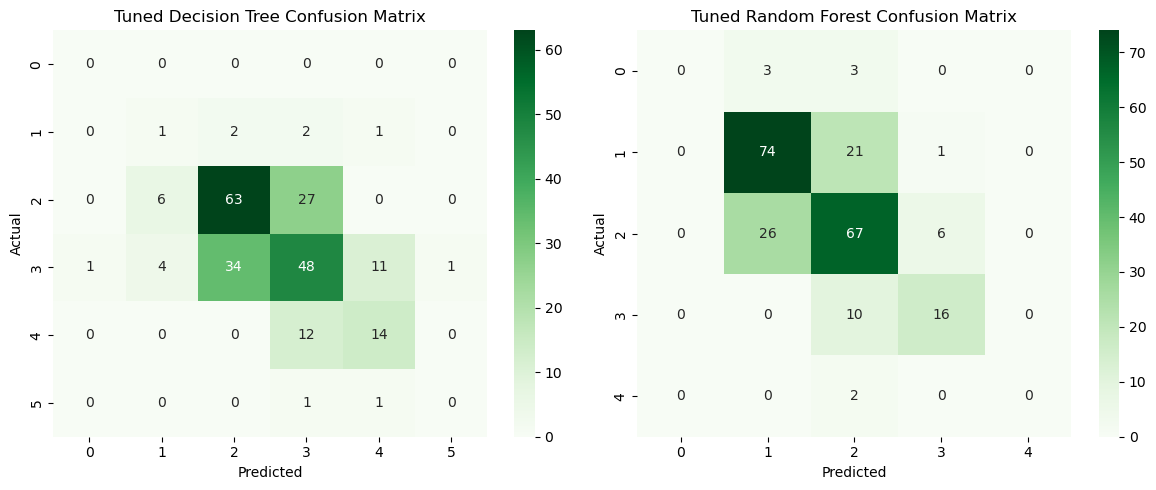


Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.09      0.17      0.12         6
           5       0.64      0.66      0.65        96
           6       0.53      0.48      0.51        99
           7       0.52      0.54      0.53        26
           8       0.00      0.00      0.00         2

    accuracy                           0.55       229
   macro avg       0.30      0.31      0.30       229
weighted avg       0.56      0.55      0.55       229


Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.77      0.74        96
           6       0.65      0.68      0.66        99
           7       0.70      0.62      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69

In [11]:
# Generating and plotting confusion matrices for tuned models
cm_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt_tuned, annot=True, fmt='d', cmap='Greens')
plt.title('Tuned Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Greens')
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Printing classification reports for tuned models
print("\nTuned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_tuned, zero_division=0))
print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned, zero_division=0))